In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [326]:
no_filter = np.array([
    [1.0,1.0,1.0],
    [1.0,1.0,1.0],
    [1.0,1.0,1.0]
])

top_edge_detector = np.array([
    [-1.0,-1.0,-1.0],
    [1.0,1.0,1.0],
    [0.0,0.0,0.0]
])

bottom_edge_detector = np.array([
    [0.0,0.0,0.0],
    [1.0,1.0,1.0],
    [-1.0,-1.0,-1.0]
])

left_edge_detector = np.array([
    [-1.0,1.0,0.0],
    [-1.0,1.0,0.0],
    [-1.0,1.0,0.0],
])

right_edge_detector = np.array([
    [0.0,1.0,-1.0],
    [0.0,1.0,-1.0],
    [0.0,1.0,-1.0],
])

In [327]:
def show_image(image):
    image = image.reshape(28,28)
    plt.imshow(image, cmap='gist_gray')

In [328]:
def apply_image_filter(image, image_filter):
    from copy import deepcopy
    image = image.reshape(28,28)
    new_image = np.zeros([28, 28])

    for row_idx in range(0, len(image), 1):
        for col_idx in range(0, len(image[row_idx]), 1):
            group = deepcopy(image[row_idx: row_idx + 3, col_idx: col_idx + 3])
            try:
                new_group = group * image_filter
                new_pixel = sum(sum(new_group))
                new_image[row_idx, col_idx] =  new_pixel
            except Exception as e:
                continue
    return new_image

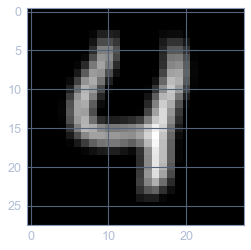

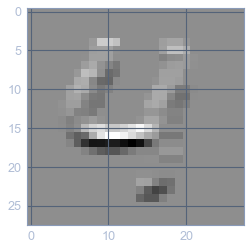

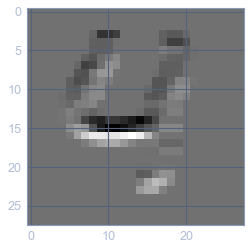

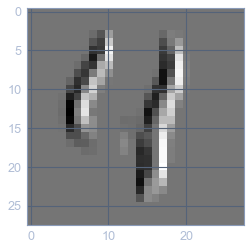

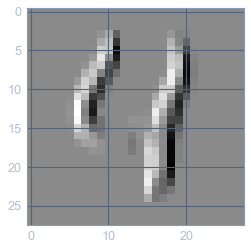

In [329]:
filters = [no_filter, top_edge_detector, bottom_edge_detector, right_edge_detector, left_edge_detector]
image = mnist.test.images[4]

for filter in filters:
    filtered_image = apply_image_filter(image, filter)
    show_image(filtered_image)
    plt.show()


White pixels are the highest values, we can see `LEFT edges` are being detected here